<a href="https://colab.research.google.com/github/Tharungovind/GOVINDTHARUN_INFO5731_FALL2024/blob/main/Govind_Tharun_Exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

Number of Topics = 2, Coherence Score = 0.40933144480853834
Number of Topics = 3, Coherence Score = 0.3651172665593056
Number of Topics = 4, Coherence Score = 0.38561468599670706
Number of Topics = 5, Coherence Score = 0.42869663132415853


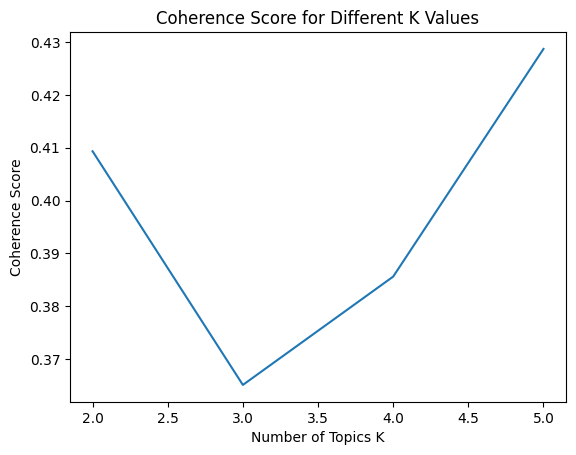


Optimal number of topics (K): 5

Topic 1: 0.073*"good" + 0.073*"product" + 0.073*"is"
Topic 2: 0.073*"was" + 0.073*"too" + 0.073*"delivery"
Topic 3: 0.131*"the" + 0.068*"was" + 0.046*"and"
Topic 4: 0.105*"the" + 0.072*"quality" + 0.039*"price"
Topic 5: 0.104*"the" + 0.054*"but" + 0.054*"with"


In [1]:
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel, CoherenceModel
import matplotlib.pyplot as plt

texts = [
    'The product is Good',
    'Delivery was too late.',
    'Good packaging and delivery.',
    'Customer service was very helpful and polite.',
    'The product quality exceeded my expectations.',
    'Shipping was fast and the product was well-packaged.',
    'Received a defective item, but the return process was smooth.',
    'The colors of the item were slightly different from the picture.',
    'The price was reasonable for the quality offered.',
    'Had issues with the installation, but the support team assisted promptly.',
    'I am satisfied with the overall experience.',
    'The product did not match the description given online.'
]

processed_docs = [[word for word in doc.lower().split()] for doc in texts]

dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

def find_optimal_k(corpus, dictionary, texts, max_k=5):
    coherence_scores = []
    models = []
    for k in range(2, max_k + 1):
        lda_model = LdaModel(corpus=corpus, num_topics=k, id2word=dictionary, passes=10)
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append(coherence_score)
        models.append(lda_model)
        print(f'Number of Topics = {k}, Coherence Score = {coherence_score}')

    plt.plot(range(2, max_k + 1), coherence_scores)
    plt.xlabel("Number of Topics K")
    plt.ylabel("Coherence Score")
    plt.title("Coherence Score for Different K Values")
    plt.show()

    optimal_k = coherence_scores.index(max(coherence_scores)) + 2
    best_model = models[optimal_k - 2]
    print(f"\nOptimal number of topics (K): {optimal_k}\n")

    for idx, topic in best_model.print_topics(num_words=3):
        print(f"Topic {idx + 1}: {topic}")

find_optimal_k(corpus, dictionary, processed_docs, max_k=5)


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [2]:
!pip install nltk

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

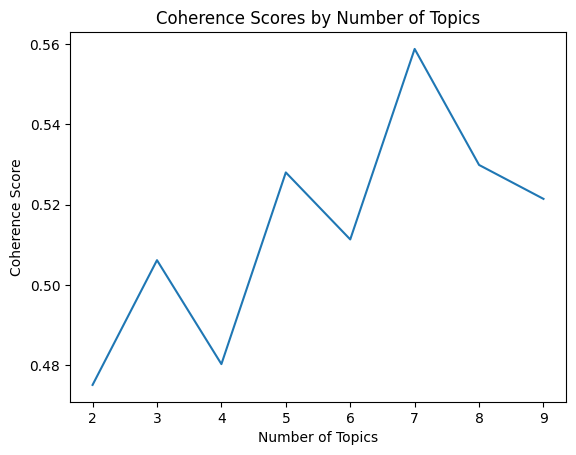

Optimal number of topics: 7
Topic 1: 0.690*"product" + 0.292*"packag" + 0.216*"well" + 0.216*"ship" + 0.216*"fast" + 0.207*"qualiti" + 0.195*"given" + 0.195*"match" + 0.195*"descript" + 0.195*"onlin"
Topic 2: -0.535*"item" + -0.331*"return" + -0.331*"process" + -0.331*"receiv" + -0.331*"defect" + -0.331*"smooth" + -0.204*"color" + -0.204*"pictur" + -0.204*"slightli" + -0.204*"differ"
Topic 3: -0.408*"team" + -0.408*"promptli" + -0.408*"instal" + -0.408*"assist" + -0.408*"issu" + -0.408*"support" + 0.000*"item" + 0.000*"slightli" + 0.000*"pictur" + 0.000*"differ"
Topic 4: -0.513*"qualiti" + 0.367*"packag" + -0.305*"reason" + -0.305*"price" + -0.305*"offer" + 0.240*"deliveri" + 0.210*"good" + -0.208*"expect" + -0.208*"exceed" + 0.193*"fast"
Topic 5: 0.406*"color" + 0.406*"pictur" + 0.406*"differ" + 0.406*"slightli" + -0.251*"receiv" + -0.251*"process" + -0.251*"return" + -0.251*"smooth" + -0.251*"defect" + 0.155*"item"
Topic 6: 0.350*"onlin" + 0.350*"match" + 0.350*"descript" + 0.350*"gi

In [3]:
# Import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# Sample documents (you can replace this with your actual text data)

documents = [
    'The product is Good',
    'Delivery was too late.',
    'Good packaging and delivery.',
    'Customer service was very helpful and polite.',
    'The product quality exceeded my expectations.',
    'Shipping was fast and the product was well-packaged.',
    'Received a defective item, but the return process was smooth.',
    'The colors of the item were slightly different from the picture.',
    'The price was reasonable for the quality offered.',
    'Had issues with the installation, but the support team assisted promptly.',
    'I am satisfied with the overall experience.',
    'The product did not match the description given online.'
]

# Step 1: Preprocess the data
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_texts(texts):
    processed_texts = []
    for text in texts:
        tokens = tokenizer.tokenize(text.lower())
        stopped_tokens = [word for word in tokens if word not in stop_words]
        stemmed_tokens = [stemmer.stem(word) for word in stopped_tokens]
        processed_texts.append(stemmed_tokens)
    return processed_texts

processed_texts = preprocess_texts(documents)

# Step 2: Create a dictionary and document-term matrix
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Step 3: Apply the LSA model and find optimal number of topics
def compute_coherence_values(dictionary, corpus, texts, start=2, limit=10, step=1):
    coherence_scores = []
    for num_topics in range(start, limit, step):
        lsi_model = LsiModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        coherence_model = CoherenceModel(model=lsi_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_scores.append(coherence_model.get_coherence())
    return coherence_scores

# Compute coherence scores for different numbers of topics
coherence_scores = compute_coherence_values(dictionary, corpus, processed_texts, start=2, limit=10, step=1)

# Step 4: Plot coherence scores
x = range(2, 10, 1)
plt.plot(x, coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Scores by Number of Topics')
plt.show()

# Step 5: Print top words for each topic for an optimal number of topics
optimal_num_topics = coherence_scores.index(max(coherence_scores)) + 2
lsi_model = LsiModel(corpus=corpus, num_topics=optimal_num_topics, id2word=dictionary)

print(f"Optimal number of topics: {optimal_num_topics}")
for idx, topic in enumerate(lsi_model.print_topics(num_topics=optimal_num_topics, num_words=10)):
    print(f"Topic {idx + 1}: {topic[1]}")


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [4]:
!pip install sentence-transformers

In [5]:
!pip install scikit-learn  bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.0 MB/s eta 0:00:00


In [6]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import CoherenceModel
# Import corpora from gensim
from gensim import corpora
import numpy as np

# Text Corpus
documents = [
    'The product is Good',
    'Delivery was too late.',
    'Good packaging and delivery.',
    'Customer service was very helpful and polite.',
    'The product quality exceeded my expectations.',
    'Shipping was fast and the product was well-packaged.',
    'Received a defective item, but the return process was smooth.',
    'The colors of the item were slightly different from the picture.',
    'The price was reasonable for the quality offered.',
    'Had issues with the installation, but the support team assisted promptly.',
    'I am satisfied with the overall experience.',
    'The product did not match the description given online.'
]
# Instantiate BERTopic with a smaller n_neighbors value
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(documents)
# Print the  topics
topic_info = topic_model.get_topic_info()
topic_info.head(5)


# topic_model.get_topic(1)

# topic_model.visualize_topics()





2024-11-02 02:13:40,240 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-11-02 02:13:51,598 - BERTopic - Embedding - Completed ✓
2024-11-02 02:13:51,601 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-02 02:14:01,430 - BERTopic - Dimensionality - Completed ✓
2024-11-02 02:14:01,433 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-02 02:14:01,443 - BERTopic - Cluster - Completed ✓
2024-11-02 02:14:01,453 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-02 02:14:01,472 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,12,-1_the_was_product_and,"[the, was, product, and, with, but, item, deli...",[The colors of the item were slightly differen...


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [7]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 29.8 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processed Documents: [['product', 'good'], ['delivery', 'late'], ['good', 'packaging', 'delivery'], ['customer', 'service', 'helpful', 'polite'], ['product', 'quality', 'exceeded', 'expectations'], ['shipping', 'fast', 'product', 'wellpackaged'], ['received', 'defective', 'item', 'return', 'process', 'smooth'], ['colors', 'item', 'slightly', 'different', 'picture'], ['price', 'reasonable', 'quality', 'offered'], ['issues', 'installation', 'support', 'team', 'assisted', 'promptly'], ['satisfied', 'overall', 'experience'], ['product', 'match', 'description', 'given', 'online']]

Topics generated by the LDA model:
(0, '0.040*"product" + 0.036*"delivery" + 0.034*"item" + 0.033*"experience" + 0.033*"overall" + 0.032*"quality" + 0.032*"satisfied" + 0.031*"smooth" + 0.031*"offered" + 0.031*"defective"')
(1, '0.071*"product" + 0.041*"good" + 0.035*"quality" + 0.034*"item" + 0.032*"delivery" + 0.031*"assisted" + 0.031*"promptly" + 0.031*"support" + 0.031*"team" + 0.031*"issues"')


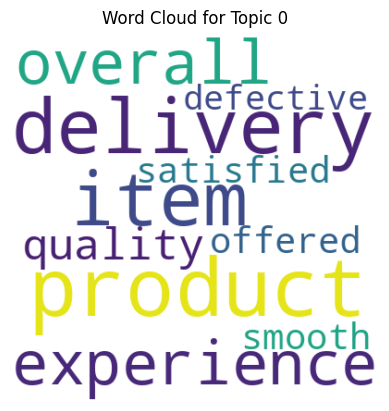

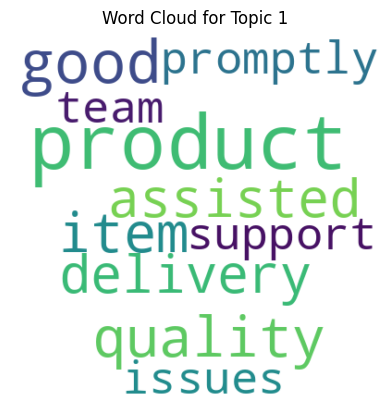

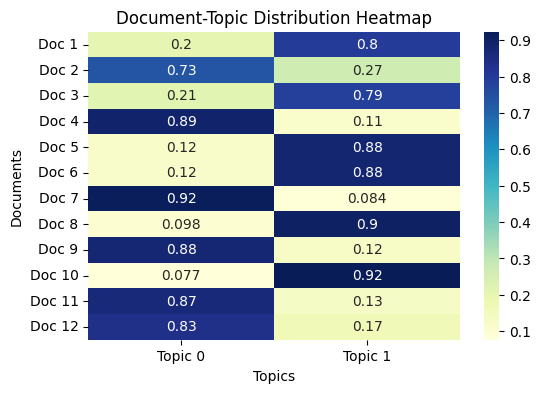

In [8]:
# Write your code here
# Then Explain the visualization
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Step 1: Given data
documents =  [
    'The product is Good',
    'Delivery was too late.',
    'Good packaging and delivery.',
    'Customer service was very helpful and polite.',
    'The product quality exceeded my expectations.',
    'Shipping was fast and the product was well-packaged.',
    'Received a defective item, but the return process was smooth.',
    'The colors of the item were slightly different from the picture.',
    'The price was reasonable for the quality offered.',
    'Had issues with the installation, but the support team assisted promptly.',
    'I am satisfied with the overall experience.',
    'The product did not match the description given online.'
]


# Step 2: Preprocessing function
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

processed_docs = [preprocess(doc) for doc in documents]
print("Processed Documents:", processed_docs)

dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=2, random_state=42)
topics = lda_model.print_topics()

print("\nTopics generated by the LDA model:")
for topic in topics:
    print(topic)

#1: Intertopic Distance Map using pyLDAvis
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

#2: Word Cloud for Each Topic
for t in range(lda_model.num_topics):
    plt.figure()
    words = dict(lda_model.show_topic(t, topn=10))
    wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(words)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Topic {t}")
    plt.show()

#3: Document-Topic Distribution Heatmap
doc_topic_distr = [dict(lda_model.get_document_topics(bow)) for bow in corpus]
doc_topic_df = pd.DataFrame.from_records(doc_topic_distr).fillna(0)

plt.figure(figsize=(6, 4))
sns.heatmap(doc_topic_df, annot=True, cmap="YlGnBu", cbar=True,
            xticklabels=[f"Topic {i}" for i in range(lda_model.num_topics)],
            yticklabels=[f"Doc {i+1}" for i in range(len(documents))])
plt.xlabel("Topics")
plt.ylabel("Documents")
plt.title("Document-Topic Distribution Heatmap")
plt.show()

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In general, BERTopic is often considered the most advanced and effective option for modern text data due to its ability to leverage contextual embeddings. LDA is still widely used for its simplicity and interpretability, particularly in larger datasets. LSA can be useful when dimensionality reduction is needed to improve topic clarity, but it may not be as effective as the other two for capturing nuances in language. The best choice ultimately depends on the specific requirements of the task, such as dataset size, desired interpretability, and computational resources available.

For BERTopic to achieve optimal results, it is important to have a large text corpus, as this allows the model to effectively capture the nuances and context of the language.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



# Answer

'''
I really enjoyed in learning and executing the scenarios of this chapter though it was challenging, referred to the lectures and references provided, resulting in  solve the questions.

Working with text data and using topic modeling algorithms like LDA and BERTopic provided a solid understanding of feature extraction and uncovering hidden themes within textual data. While LDA's reliance on coherence scores helped reinforce the importance of parameter tuning, BERTopic's use of embeddings and clustering added clarity to more nuanced topic representations. A primary challenge was optimizing for coherence and handling errors related to matrix operations, which deepened my understanding of model configurations and data preprocessing.


'''